# Análisis inicial del dataset 

El dataset está compuesto por 161 documentos del año 2010 al 2024 y con los siguientes gobernadores: Bernanke, Yellen y Powell.  

### Librerías 

In [1]:
import os
import re
import pandas as pd
import PyPDF2
import matplotlib.pyplot as plt

### Cargar archivos 

In [2]:
discursos_folder = 'discursos2/textos2'
texto_discursos = []
fechas = []
personas = []

# Nombres de las personas buscadas
nombres_personas = ['bernanke', 'yellen', 'powell']

# Itera a través de cada archivo en la carpeta
for archivo_nombre in os.listdir(discursos_folder):
    if archivo_nombre.endswith('.pdf'):
        # Extraer la fecha del nombre del archivo
        fecha_match = re.search(r'(\d{4})(\d{2})(\d{2})', archivo_nombre)
        if fecha_match:
            año, mes, dia = fecha_match.groups()
            fecha = f'{año}-{mes}-{dia}'
            fechas.append(fecha)
        
       # Buscar el nombre de la persona en el nombre del archivo
        persona = None
        for nombre in nombres_personas:
            if nombre in archivo_nombre.lower():
                persona = nombre
                break
        
        personas.append(persona)
        
        # Construye la ruta completa del archivo
        archivo_ruta = os.path.join(discursos_folder, archivo_nombre)
        
        # Abre el archivo PDF en modo de lectura binaria
        with open(archivo_ruta, 'rb') as archivo_pdf:
            # Crea un objeto PDFReader
            lector_pdf = PyPDF2.PdfReader(archivo_pdf)
            
            # Itera a través de cada página y extrae el texto
            texto_archivo = ''
            for pagina in lector_pdf.pages:
                texto_archivo += pagina.extract_text()

            # Agrega el texto del archivo a la lista de discursos
            texto_discursos.append(texto_archivo)

# Crear DataFrame
data = {'texto': texto_discursos, 'fecha': fechas, 'persona': personas}
df = pd.DataFrame(data)

df.head(2)

,texto,fecha,persona
0,For release on delivery \n12:30 p.m. ED...,2015-07-10,yellen
1,For release on delivery \n9:00 a.m. EST \nFeb...,2012-02-16,bernanke


In [3]:
df.replace('\n', '.', regex=True, inplace=True)
pd.set_option('display.max_colwidth', 200)
df.head(2)

,texto,fecha,persona
0,"For release on delivery .12:30 p.m. EDT .July 10, 2015 . . .Recent Developments and the Outlook for the Economy . .Remarks by . .Janet L. Yellen . .Chair . .Board of Gov...",2015-07-10,yellen
1,"For release on delivery .9:00 a.m. EST .February 1 6, 2012 . . . . . . .Community Banking . . . . .Remarks by . .Ben S. Bernanke . .Chairman . .Board of Governors of the Federal Reserve Syst...",2012-02-16,bernanke


In [4]:
df['fecha'] = pd.to_datetime(df['fecha'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   texto    161 non-null    object        
 1   fecha    161 non-null    datetime64[ns]
 2   persona  161 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 3.9+ KB


### Distribución de discursos en el tiempo

##### Anual

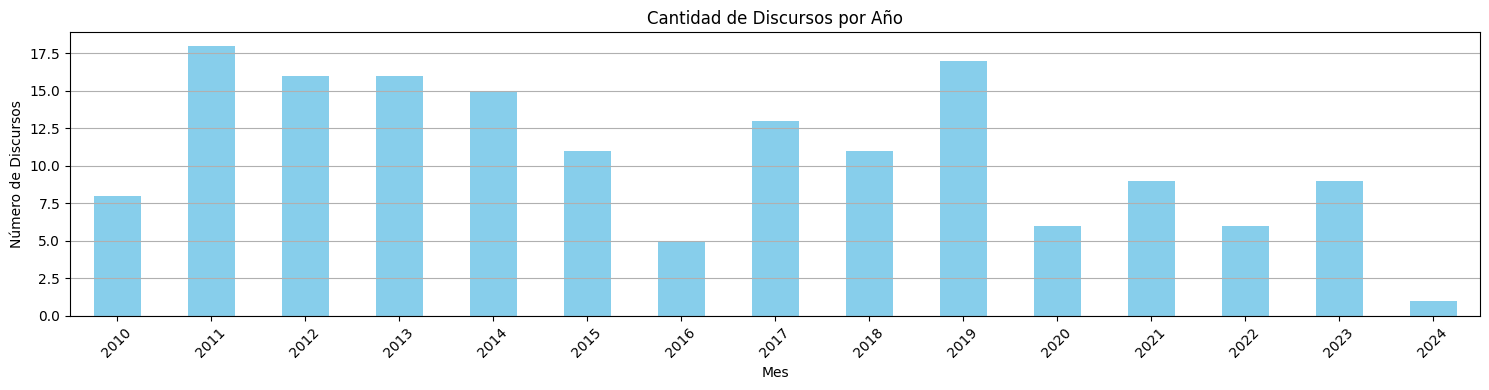

In [5]:
conteo_por_ano = df.groupby(df['fecha'].dt.strftime('%Y'))['fecha'].count()

# Visualizar la cantidad de discursos por mes en un gráfico de barras
plt.figure(figsize=(15, 4))
conteo_por_ano.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Discursos por Año')
plt.xlabel('Mes')
plt.ylabel('Número de Discursos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Mensual

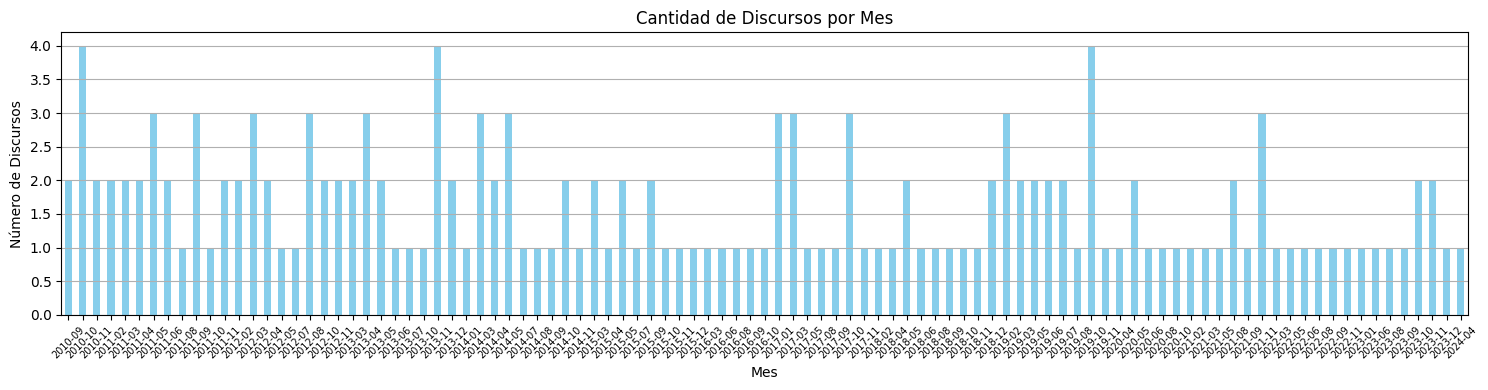

In [6]:
conteo_por_mes = df.groupby(df['fecha'].dt.strftime('%Y-%m'))['fecha'].count()

# Visualizar la cantidad de discursos por mes en un gráfico de barras
plt.figure(figsize=(15, 4))
conteo_por_mes.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Discursos por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Discursos')
plt.xticks(rotation=45, fontsize=7)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

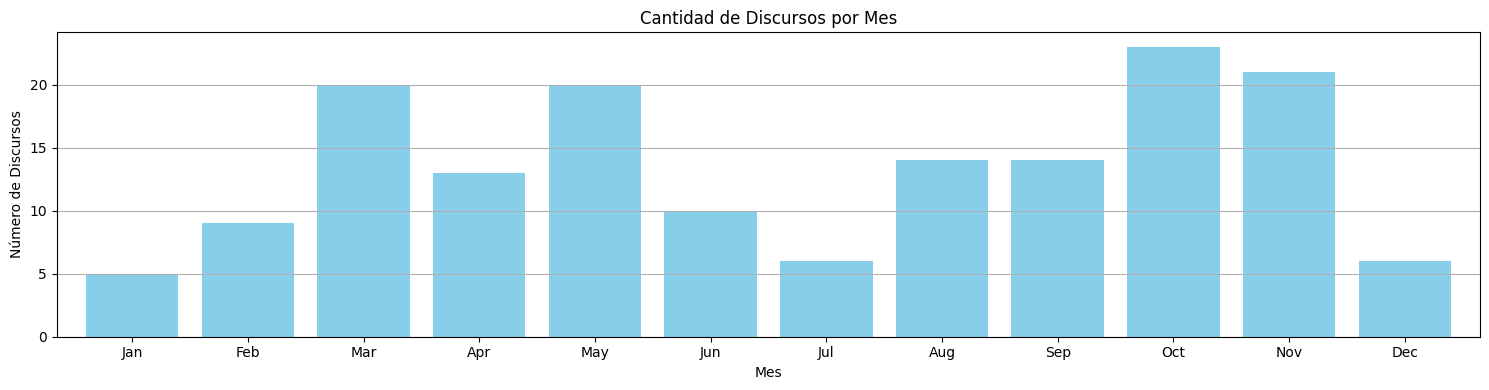

In [7]:
conteo_por_mes = df.groupby(df['fecha'].dt.strftime('%b'))['fecha'].count()

# Reordenar los meses para que aparezcan en orden cronológico
meses_ordenados = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
conteo_por_mes = conteo_por_mes.reindex(meses_ordenados)

# Visualizar la cantidad de discursos por mes en un gráfico de barras
plt.figure(figsize=(15, 4))
conteo_por_mes.plot(kind='bar', color='skyblue', width=0.8)
plt.title('Cantidad de Discursos por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Discursos')
plt.xticks(rotation=0)  # Sin rotación en las etiquetas del eje x
plt.grid(axis='y')
plt.tight_layout()
plt.show()

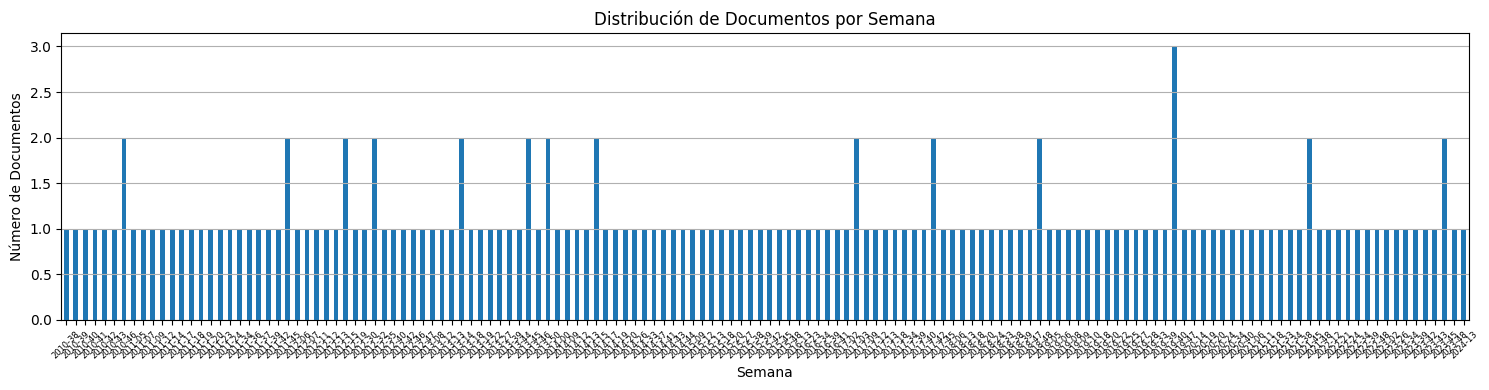

In [8]:
df['semana'] = df['fecha'].dt.strftime('%Y-%U')
conteo_semanal = df['semana'].value_counts().sort_index()

plt.figure(figsize=(15, 4))
conteo_semanal.plot(kind='bar')
plt.title('Distribución de Documentos por Semana')
plt.xlabel('Semana')
plt.ylabel('Número de Documentos')
plt.xticks(rotation=45, fontsize=6)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

¿Cuántas semanas no tengo discursos? 